In [15]:
#imports

import os
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.callbacks import Callback


In [16]:
#Loading the dataset
mnist = keras.datasets.mnist
(x_full, y_full), (x_test_full, y_test_full) = mnist.load_data()

In [17]:
# Training Data
'''
TRAINING DATA
5400 - ones/zeros
5400 - other 
    [600 * 9 of 1/0 to 9]
'''

x_train_0 = x_full[y_full == 0][:5400]
y_train_0 = np.ones((5400,))
print("shape_training_0 =>")
print("\t",x_train_0.shape)
print("\t",y_train_0.shape)

x_train_others = []
y_train_others = []
for digit in range(1,10):
    x_digit = x_full[y_full == digit][:600]
    y_digit = np.zeros((600,))  
    x_train_others.append(x_digit)
    y_train_others.append(y_digit)
print("lenght_training_other =>")
print("\t",len(x_train_others),len(y_train_others))

x_train_others = np.concatenate(x_train_others, axis=0)
y_train_others = np.concatenate(y_train_others, axis=0)
print("shape_training_other =>")
print("\t",x_train_others.shape)
print("\t",y_train_others.shape)

x_train = np.concatenate([x_train_0, x_train_others], axis=0)
y_train = np.concatenate([y_train_0, y_train_others], axis=0)
x_train, y_train = shuffle(x_train, y_train, random_state=42)
print("shape_training_complete =>")
print("\t",x_train.shape)
print("\t",y_train.shape)


shape_training_0 =>
	 (5400, 28, 28)
	 (5400,)
lenght_training_other =>
	 9 9
shape_training_other =>
	 (5400, 28, 28)
	 (5400,)
shape_training_complete =>
	 (10800, 28, 28)
	 (10800,)


In [18]:
# Testing Data
'''
TESTING DATA
810 - ones/zeros
810 - other 
    [90 * 9 of 1/0 to 9]
'''

x_test_0 = x_test_full[y_test_full == 0][:810]
y_test_0 = np.ones((810,))
print("shape_testing_0 =>")
print("\t",x_test_0.shape)
print("\t",y_test_0.shape)

x_test_others = []
y_test_others = []
for digit in range(1,10):
    x_digit = x_test_full[y_test_full == digit][:90]
    y_digit = np.zeros((90,))  
    x_test_others.append(x_digit)
    y_test_others.append(y_digit)
print("lenght_testing_other =>")
print("\t",len(x_test_others),len(y_test_others))

x_test_others = np.concatenate(x_test_others, axis=0)
y_test_others = np.concatenate(y_test_others, axis=0)
print("shape_testing_other =>")
print("\t",x_test_others.shape)
print("\t",y_test_others.shape)


x_test = np.concatenate([x_test_0, x_test_others], axis=0)
y_test = np.concatenate([y_test_0, y_test_others], axis=0)
x_test, y_test = shuffle(x_test, y_test, random_state=42)
print("shape_testing_complete =>")
print("\t",x_test.shape)
print("\t",y_test.shape)


shape_testing_0 =>
	 (810, 28, 28)
	 (810,)
lenght_testing_other =>
	 9 9
shape_testing_other =>
	 (810, 28, 28)
	 (810,)
shape_testing_complete =>
	 (1620, 28, 28)
	 (1620,)


In [19]:
# Define the model
model = models.Sequential()

model.add(layers.Conv2D(1, (3, 3), padding='valid', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(85, activation='relu'))
model.add(layers.Dense(42, activation='relu'))
model.add(layers.Dense(21, activation='relu'))
model.add(layers.Dense(11, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  

model.compile(
    optimizer='adam',               
    loss='binary_crossentropy',    
    metrics=['accuracy']           
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 169)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 85)             │        14,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 42)             │         3,612 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 21)             │           903 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 11)             │           242 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,306 (75.41 KB)

 Trainable params: 19,306 (75.41 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
x=model.get_weights()[16]
print((x))

[[-1.1204524]
 [-0.9198587]]


In [21]:
def load_model_weights(model, weight_dir="../generateModelWeights_week4/InitWeights"):
    
    for layer_num, layer in enumerate(model.layers):
        file_path = os.path.join(weight_dir, f"layer_number_{layer_num}.npz")
        if os.path.exists(file_path):
            loaded = np.load(file_path)
            weights = [loaded[key] for key in loaded]
            if layer.weights: 
                layer.set_weights(weights)
                print(f"Loaded weights for layer {layer_num} from {file_path}")
            else:
                print(f"Layer {layer_num} has no weights.")
        else:
            print(f"No weights found for layer {layer_num}.")

load_model_weights(model)

Loaded weights for layer 0 from ../generateModelWeights_week4/InitWeights\layer_number_0.npz
No weights found for layer 1.
No weights found for layer 2.
Loaded weights for layer 3 from ../generateModelWeights_week4/InitWeights\layer_number_3.npz
Loaded weights for layer 4 from ../generateModelWeights_week4/InitWeights\layer_number_4.npz
Loaded weights for layer 5 from ../generateModelWeights_week4/InitWeights\layer_number_5.npz
Loaded weights for layer 6 from ../generateModelWeights_week4/InitWeights\layer_number_6.npz
Loaded weights for layer 7 from ../generateModelWeights_week4/InitWeights\layer_number_7.npz
Loaded weights for layer 8 from ../generateModelWeights_week4/InitWeights\layer_number_8.npz
Loaded weights for layer 9 from ../generateModelWeights_week4/InitWeights\layer_number_9.npz
Loaded weights for layer 10 from ../generateModelWeights_week4/InitWeights\layer_number_10.npz


In [22]:
'''
Should match
[[-0.08528328]
 [-0.45619076]]
'''
x=model.get_weights()[16]
print((x))

[[-0.08528328]
 [-0.45619076]]


In [23]:
class SaveWeightsCallback(callbacks.Callback):
    def __init__(self, save_dir):
        super(SaveWeightsCallback, self).__init__()
        self.save_dir = save_dir

    def on_epoch_end(self, epoch, logs=None):
        epoch_dir = os.path.join(self.save_dir, f"AfterEpoch{epoch + 1}")
        if not os.path.exists(epoch_dir):
            os.makedirs(epoch_dir)
        
        for layer_num, layer in enumerate(self.model.layers):
            if layer.weights:  # Only save weights for layers that have weights
                file_path = os.path.join(epoch_dir, f"Layer_{layer_num}.npz")
                weights = layer.get_weights()
                np.savez(file_path, *weights)
                print(f"Saved weights for layer {layer_num} to {file_path}")


In [24]:
save_dir = "./ZeroModelWeightsTraining"
save_weights_callback = SaveWeightsCallback(save_dir)

In [25]:
history = model.fit(
    x_train, y_train,
    epochs=10,  
    callbacks=[save_weights_callback]
)

Epoch 1/10
334/338 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7248 - loss: 0.5440Saved weights for layer 0 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_0.npz
Saved weights for layer 3 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_3.npz
Saved weights for layer 4 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_4.npz
Saved weights for layer 5 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_5.npz
Saved weights for layer 6 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_6.npz
Saved weights for layer 7 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_7.npz
Saved weights for layer 8 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_8.npz
Saved weights for layer 9 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_9.npz
Saved weights for layer 10 to ./ZeroModelWeightsTraining\AfterEpoch1\Layer_10.npz
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7269 - loss: 0.5424
Epoch 2/10
334/338 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9759 - loss: 0.2995Saved weights for layer 0 to ./Ze

In [26]:
for epoch, accuracy in enumerate(history.history['accuracy'], 1):
    print(f"Epoch {epoch}: Accuracy = {accuracy:.4f}")


Epoch 1: Accuracy = 0.8682
Epoch 2: Accuracy = 0.9780
Epoch 3: Accuracy = 0.9855
Epoch 4: Accuracy = 0.9845
Epoch 5: Accuracy = 0.9890
Epoch 6: Accuracy = 0.9909
Epoch 7: Accuracy = 0.9919
Epoch 8: Accuracy = 0.9936
Epoch 9: Accuracy = 0.9950
Epoch 10: Accuracy = 0.9929


In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9876 - loss: 0.1030
Test accuracy: 0.989506185054779


In [28]:

import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot kernel
def plot_kernel(kernel, title):
    plt.figure(figsize=(6, 6))
    # Extract the 2D slice of the kernel weights
    kernel_2d = kernel.reshape(3,3) # Assumes single channel filter
    sns.heatmap(kernel_2d, annot=True, cmap="coolwarm", cbar=True)
    plt.title(title)
    plt.show()

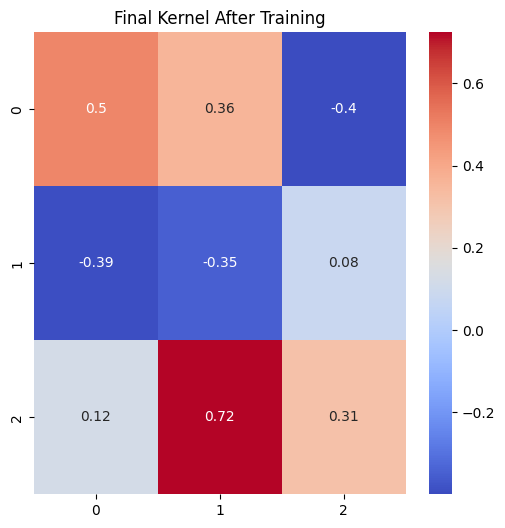

In [29]:
# After training, extract and plot the kernel weights
final_kernel = model.layers[0].get_weights()[0]
plot_kernel(final_kernel, 'Final Kernel After Training')

In [30]:
def load_model_weights(model, weight_dir="../generateModelWeights_week4/InitWeightsConv"):
    file_path = os.path.join(weight_dir, f"layer_number_0.npz")
    loaded = np.load(file_path)
    weights = [loaded[key] for key in loaded]
    model.layers[0].set_weights(weights)

load_model_weights(model)

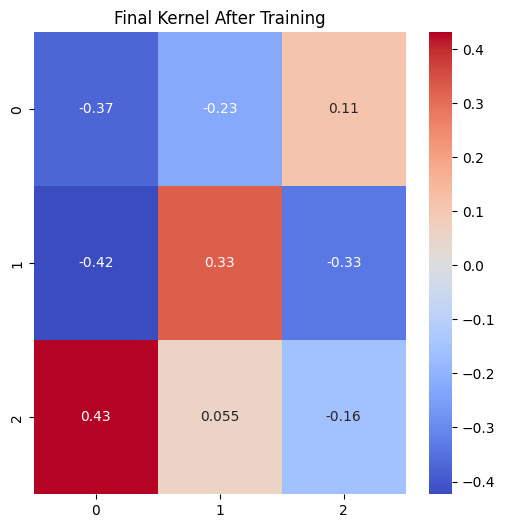

In [31]:
# After training, extract and plot the kernel weights
final_kernel = model.layers[0].get_weights()[0]
plot_kernel(final_kernel, 'Final Kernel After Training')

In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4271 - loss: 7.2780
Test accuracy: 0.44691357016563416
